In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab2_Files/'
path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab2_Files/'
filename_noisy = path +'noisy.jpg'
filename_mask = path +'damage_mask.bmp'
filename_damaged = path +'damaged_cameraman.bmp'

 damaged_cameraman.bmp	'lab2_part1&2.ipynb'   noisy.jpg
 damage_mask.bmp	 lab2_part3.ipynb      test.jpg


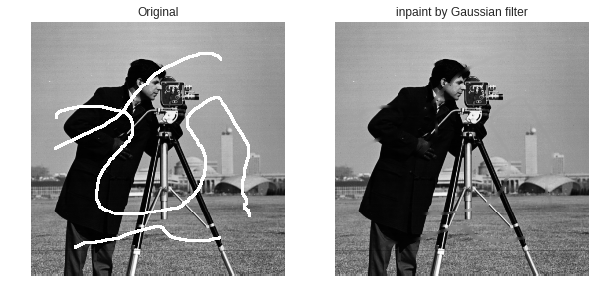

In [7]:
#lab 2 part3 

import skimage
import numpy as np
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import color


class image_inpainting():
  def __init__(self):
    self.img_dmg = io.imread(filename_damaged,as_grey=True)
    self.img_mask = io.imread(filename_mask, as_gray=True)
    self.height =0
    self.width =0
    #tem list to store new undamaged pixels
    self.gauss_img =[]
    
  def getdimension(self):
    #get the height and width of the damaged image
    dimension = self.img_dmg.shape
    self.height = dimension[0]
    self.width = dimension[1]
    
    return
  
  def gaussian_filter(self):
    self.gauss_img = gaussian(self.img_dmg,sigma=1) 

  
      
  def mult_gaussian(self):
    self.gauss_img = gaussian(self.gauss_img,sigma=1)
    
  
  def display(self):
    
    #plt.subplot(121), plt.imshow(self.img_dmg), plt.title('Original')
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(122), plt.imshow(self.img_mask), plt.title('Filtered')
    #plt.xticks([]), plt.yticks([])
    #plt.show()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    ax1.set_title("Original")
    ax1.axis('off')
    ax1.imshow(self.img_dmg,cmap=plt.cm.gray)
    ax2.set_title("inpaint by Gaussian filter")
    ax2.axis('off')
    ax2.imshow(self.gauss_img,cmap=plt.cm.gray)

  def inpaint(self):
    image_inpainting.mult_gaussian(self)
    for i in range(0, self.height):
        for j in range(0, self.width):
            if self.img_mask[i][j] != 0:
              self.gauss_img[i][j] = self.img_dmg[i][j]

    return
    
    
def main():
  a= image_inpainting()
  a.getdimension()
  a.gaussian_filter()
  for i in range (0,20):
    a.inpaint()
  a.display()
  

if __name__ == "__main__":
  main()

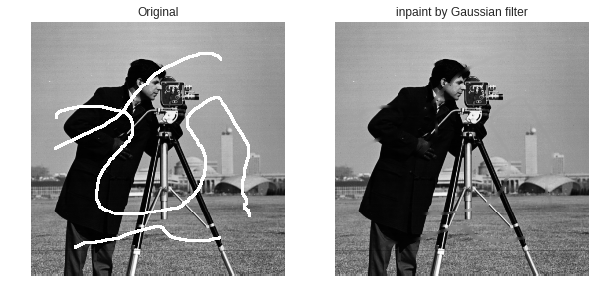

In [8]:
#lab 2 part3 

import skimage
import numpy as np
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import color


class image_inpainting():
  def __init__(self):
    self.img_dmg = io.imread(filename_damaged,as_grey=True)
    self.img_mask = io.imread(filename_mask, as_gray=True)
    self.height =0
    self.width =0
    self.switch =0
    self.gauss_img =[]
    
  def getdimension(self):
    #get the height and width of the damaged image
    dimension = self.img_dmg.shape
    self.height = dimension[0]
    self.width = dimension[1]
    
    return
  
  def gaussian_filter(self):
    if self.switch == 0:
      self.gauss_img = gaussian(self.img_dmg,sigma=1) 
      self.switch =1
    else:
      self.gauss_img = gaussian(self.gauss_img,sigma=1)
      
  
  
  def display(self):
    
    #plt.subplot(121), plt.imshow(self.img_dmg), plt.title('Original')
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(122), plt.imshow(self.img_mask), plt.title('Filtered')
    #plt.xticks([]), plt.yticks([])
    #plt.show()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    ax1.set_title("Original")
    ax1.axis('off')
    ax1.imshow(self.img_dmg,cmap=plt.cm.gray)
    ax2.set_title("inpaint by Gaussian filter")
    ax2.axis('off')
    ax2.imshow(self.gauss_img,cmap=plt.cm.gray)

  def inpaint(self):
    image_inpainting.gaussian_filter(self)
    for i in range(0, self.height):
        for j in range(0, self.width):
            if self.img_mask[i][j] != 0:
              self.gauss_img[i][j] = self.img_dmg[i][j]

    return
    
    
def main():
  a= image_inpainting()
  a.getdimension()
  for i in range (0,20):
    a.inpaint()
  a.display()
  

if __name__ == "__main__":
  main()